In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression

In [2]:
creditcard_data=pd.read_csv('creditcard.csv')

In [3]:
#Use parameter 'n' to display instances other than 5.
creditcard_data.head(n=20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
#Number of instances and attributes,i.e., Dimensionality of the dataset
creditcard_data.shape

(284807, 31)

###### Thus there are 284807 rows and 31 columns.

In [5]:
#observe the different feature type present in the data
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

###### This shows that there are 284807 instances and 31 attributes including the class attribute.

In [6]:
#Sum of missing cells for each attribute
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###### The 0 sum for all attributes shows that there are no missing values.

In [7]:
#Number of distinct categories or classes i.e., Fraudulent and Genuine
creditcard_data['Class'].nunique()

2

###### As expected, there are only 2 classes.

In [8]:
#number of instances per class
creditcard_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

###### This shows a complete imbalance of classes. There are 284315 'Genuine' (0) instances and only 492 'Fraudulent' (1) instances.

In [9]:
#Here we will observe the distribution of our classes
classes=creditcard_data['Class'].value_counts()
normal_share=classes[0]/creditcard_data['Class'].count()*100
fraud_share=classes[1]/creditcard_data['Class'].count()*100

print("normal_share=",normal_share,"            ","fraud_share=",fraud_share)

imbalance= (fraud_share/normal_share)*100
print('Imbalance Percentage = ' + str(imbalance))

normal_share= 99.82725143693798              fraud_share= 0.1727485630620034
Imbalance Percentage = 0.173047500131896


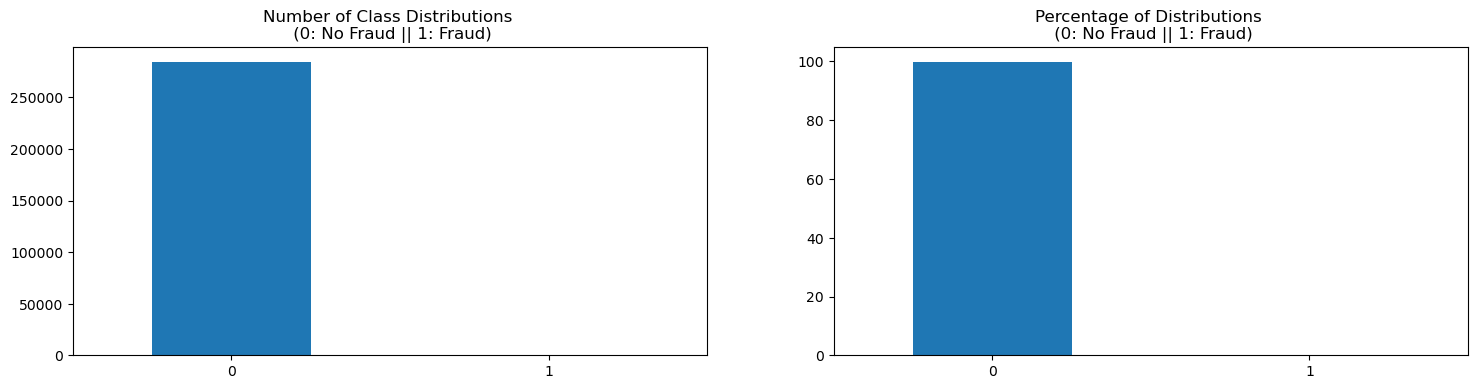

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig, ax = plt.subplots(1, 2, figsize=(18,4))

classes.plot(kind='bar', rot=0, ax=ax[0])
ax[0].set_title('Number of Class Distributions \n (0: No Fraud || 1: Fraud)')

(classes/creditcard_data['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
ax[1].set_title('Percentage of Distributions \n (0: No Fraud || 1: Fraud)')

plt.show()


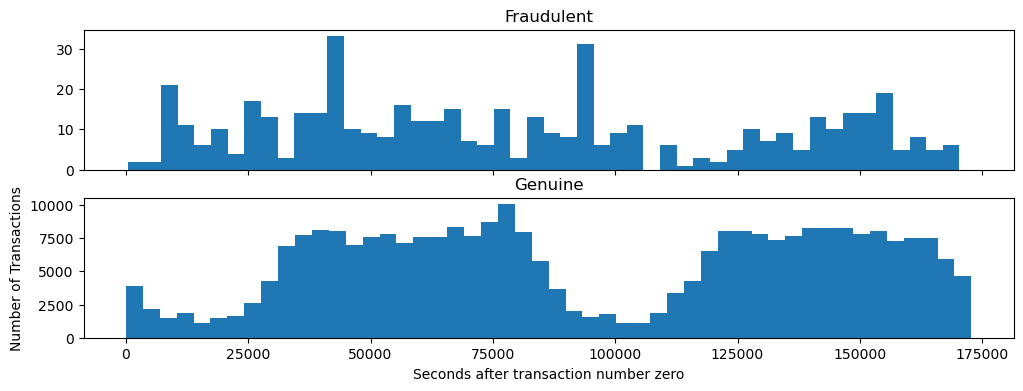

In [11]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(creditcard_data["Time"][creditcard_data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(creditcard_data["Time"][creditcard_data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

###### The transactions occur in a cyclic way. But the time feature does not provide any useful information as the time when the first transaction was initiated is not given. Thus, we'll drop this feature.

In [12]:
# Drop unnecessary columns
creditcard_data = creditcard_data.drop(['Time'],axis=1)
creditcard_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###### Now there are 30 features in the dataset.

##### DESCRIPTIVE STATISTICS

In [13]:
creditcard_data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666


In [14]:
creditcard_data.shape

(284807, 30)

###### Thus there are 284807 rows and 31 columns.

##### FRAUD CASES AND GENUINE CASES

In [15]:
fraud_cases=len(creditcard_data[creditcard_data['Class']==1])
print('Fraudulent Transactions:',fraud_cases)

Fraudulent Transactions: 492


In [16]:
non_fraud_cases=len(creditcard_data[creditcard_data['Class']==0])
print('Genuine Transactions:',non_fraud_cases)

Genuine Transactions: 284315


In [17]:
#Descriptive statistics for Fraudulent Transactions
print("Fraudulent Transactions")
creditcard_data['Amount'][creditcard_data['Class']==1]. describe()


Fraudulent Transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
#Descriptive statistics for Genuine Transactions
print("Genuine Transactions")
creditcard_data['Amount'][creditcard_data['Class']==0]. describe()

Genuine Transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

###### Nothing much can be determined from the Amount, as most of the transactions are around 100 in both cases..

In [19]:

df=creditcard_data

## Splitting Data set into Training and Testing

In [20]:
from sklearn.model_selection import train_test_split
#df.drop('Time',axis=1,inplace=True)

x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)
# Check the class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)


{0: 284315, 1: 284315}


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0)
print("Training Sample Size",X_train.shape)
print("Testing Sample Size",X_test.shape)

Training Sample Size (454904, 29)
Testing Sample Size (113726, 29)


###### As seen above, the labels are almost equally distributed in all the three datasets

## Model Evaluation

## A.Logistic Regression

In [23]:
#logstric
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=None)

for c in [0.01, 0.1, 1, 10]:
    print("C=",c, "Penalty= l2")
    logreg_classifier = linear_model.LogisticRegression(penalty='l2',C=c)
    logreg_classifier.fit(X_train,y_train)
    y_test_pred= logreg_classifier.predict_proba(X_test)
    cv_score= roc_auc_score(y_true=y_test,y_score=y_test_pred[:,1])
    print("ROC-AUC Score=", cv_score)
    


C= 0.01 Penalty= l2
ROC-AUC Score= 0.991752615975299
C= 0.1 Penalty= l2
ROC-AUC Score= 0.9915731683878951
C= 1 Penalty= l2
ROC-AUC Score= 0.9914209081278801
C= 10 Penalty= l2
ROC-AUC Score= 0.9911634875255213


###### We are considering value of C as 0.01 from the above results, because it has highest score


In [24]:
clf = linear_model.LogisticRegression(penalty='l2',C=0.01)  
clf.fit(X_train, y_train)
#predict on test to give probability
y_pred= clf.predict_proba(X_test)
#calculate the ROC-AUC
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("LogisticRegression ROC-AUC Score =", score)

#diff bw predict and predict_prob

LogisticRegression ROC-AUC Score = 0.991752615975299


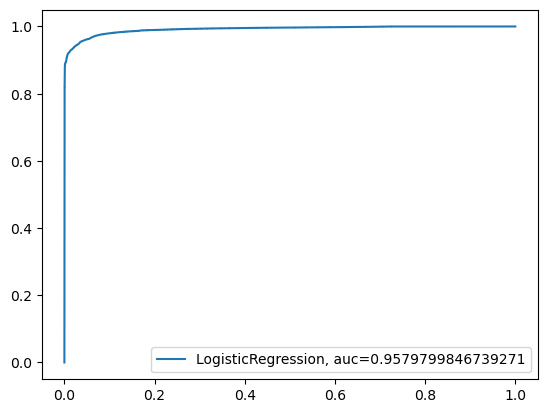

In [25]:
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion Matrix


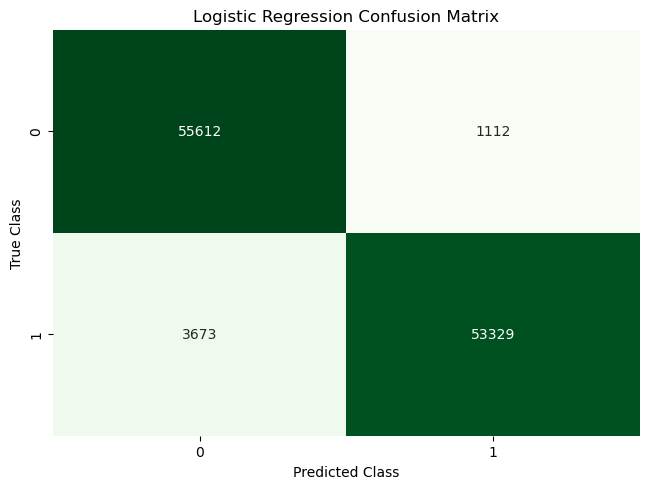

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

cm=confusion_matrix(y_test, y_pred)
#print(cm)
LR_ConfusionMatrix = pd.DataFrame(cm, index=[0,1], columns=[0,1])
sns.heatmap(LR_ConfusionMatrix , annot=True, cbar=None, cmap='Greens', fmt = 'g')

plt.title("Logistic Regression Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Evaluation Metrics


In [14]:
f1=f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
pr=precision_score(y_test, y_pred)
t=tp+tn+fn+fp
print("specificity: "+str(tn/(tn+fp)))
print("sensitivity: "+str(tp/(tp+fn)))
print("accuracy_score:",acc)
print("precision_score:",pr)
print("f1_score:",f1)

specificity: 0.9803963049150272
sensitivity: 0.9355636644328269
accuracy_score: 0.9579251886112234
precision_score: 0.9795742179607281
f1_score: 0.9570632520660786


## Support Vector Classifier


In [15]:
from sklearn.svm import SVC

### Confusion Matrix

SVC Train Score:  45.69
SVC Test Score:  45.66


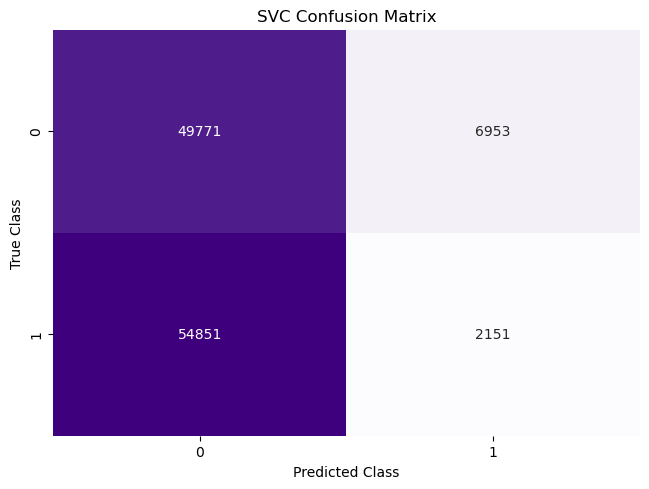

In [16]:
#SVC Model
clf_svc = SVC(kernel= 'rbf', max_iter=100, C=1.0, gamma='auto')
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
#Score
TrainScore =  round(clf_svc.score(X_train, y_train) * 100, 2)
TestScore = round(clf_svc.score(X_test, y_test) * 100, 2)
print('SVC Train Score: ', TrainScore)
print('SVC Test Score: ',TestScore)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
SVC_ConfusionMatrix = pd.DataFrame(cm, index=[0,1], columns=[0,1])
sns.heatmap(SVC_ConfusionMatrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')

plt.title("SVC Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [17]:
f1=f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
pr=precision_score(y_test, y_pred)
t=tp+tn+fn+fp
print("specificity: "+str(tn/(tn+fp)))
print("sensitivity: "+str(tp/(tp+fn)))
print("accuracy_score:",acc)
print("precision_score:",pr)
print("f1_score:",f1)

specificity: 0.8774240180523235
sensitivity: 0.03773551805199817
accuracy_score: 0.45655347062237306
precision_score: 0.23626977152899825
f1_score: 0.06507730009378876


# K-Nearest Neighbour Classifier


###### Testing and Training Accuracy for different values of K


n_neighbors= 3
ROC-AUC Score= 0.9993565097303051
n_neighbors= 5
ROC-AUC Score= 0.999453132725465
n_neighbors= 7
ROC-AUC Score= 0.9995052345274668
n_neighbors= 9
ROC-AUC Score= 0.9995478076052845


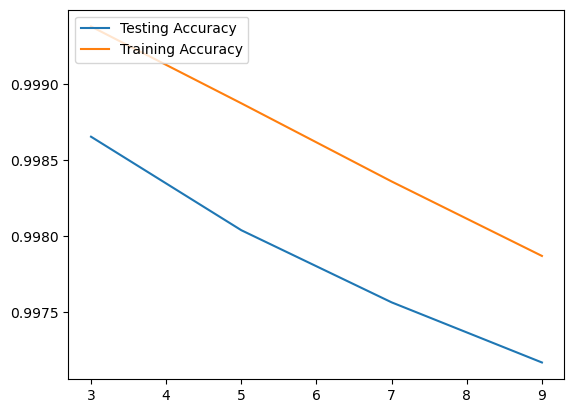

In [18]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
a=[3,5,7,9]
test_accuracy=[]
train_accuracy=[]
for n_neighbor in [3,5,7,9]:
    print("n_neighbors=",n_neighbor)
    cv_score_mean=0
    k_score=0
    knn_classifier= KNeighborsClassifier(n_neighbors=n_neighbor)
    knn_classifier.fit(X_train,y_train)
    y_test_pred= knn_classifier.predict_proba(X_test)
    cv_score= roc_auc_score(y_true=y_test,y_score=y_test_pred[:,1])
    
    k_score=knn_classifier.score(X_test,y_test)
    k_score1=knn_classifier.score(X_train,y_train)
    print("ROC-AUC Score=", cv_score)
    test_accuracy.append(k_score)
    train_accuracy.append(k_score1)
plt.plot(a,test_accuracy,label='Testing Accuracy')
plt.plot(a,train_accuracy,label='Training Accuracy')
plt.legend(loc=2)

plt.show()

###### We are considering n_neigbors as 5 because it has the highest R0C-AUC Score


In [19]:
clf = KNeighborsClassifier(n_neighbors=5)  
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("KNeighbors Classifier ROC-AUC Score =", score)


KNeighbors Classifier ROC-AUC Score = 0.999453132725465


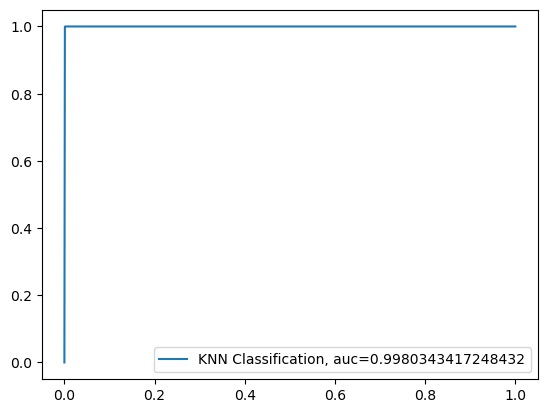

In [20]:
y_pred = clf.predict(X_test)
y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="KNN Classification, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion Matrix

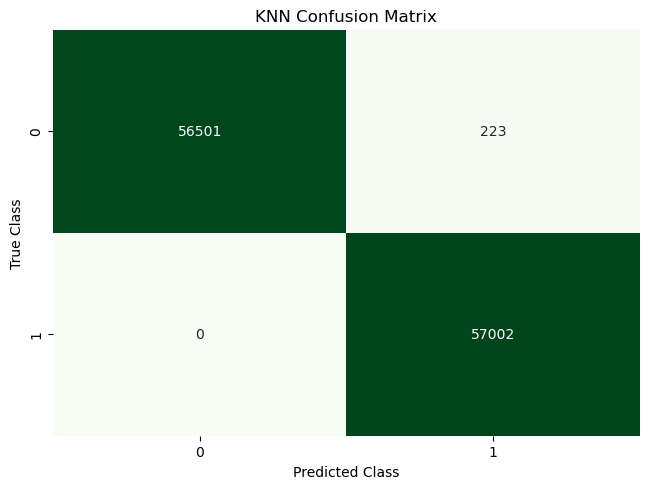

In [21]:
cm=confusion_matrix(y_test, y_pred)
#print(cm)
KNN_ConfusionMatrix = pd.DataFrame(cm, index=[0,1], columns=[0,1])
sns.heatmap(KNN_ConfusionMatrix , annot=True, cbar=None, cmap='Greens', fmt = 'g')
plt.title("KNN Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Evaluation Metrics


In [22]:
f1=f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
pr=precision_score(y_test, y_pred)
t=tp+tn+fn+fp
print("specificity: "+str(tn/(tn+fp)))
print("sensitivity: "+str(tp/(tp+fn)))
print("accuracy_score:",acc)
print("precision_score:",pr)
print("f1_score:",f1)

specificity: 0.9960686834496862
sensitivity: 1.0
accuracy_score: 0.9980391467210664
precision_score: 0.9961031017911752
f1_score: 0.9980477470300367


### K-Fold Cross Validation (k=5)


In [24]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
Logistic_scores= cross_val_score(LogisticRegression(),X_resampled,y_resampled,scoring='accuracy',cv=cv)
svc_scores= cross_val_score(clf_svc,X_resampled,y_resampled,scoring='accuracy',cv=cv)
knn_scores = cross_val_score(clf,X_resampled,y_resampled,scoring='accuracy',cv=cv,n_jobs=-1)


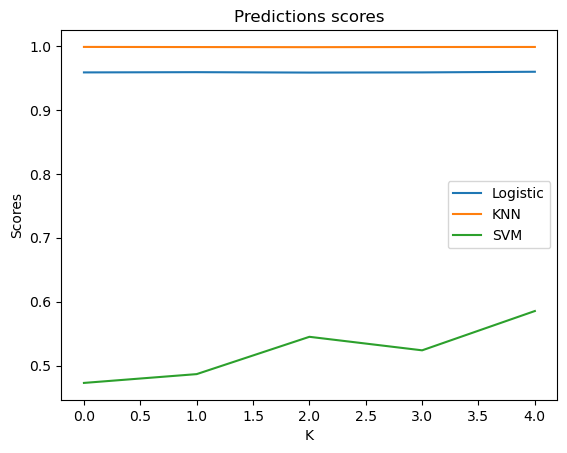

In [25]:
r =5
b = np.array([])
for i in range(r):
    b = np.append(b,[i,Logistic_scores[i],knn_scores[i],svc_scores[i]])
b = b.reshape(5,4)
df1 = pd.DataFrame(b, columns=["I",'Logistic','KNN','SVM'])
plt.title('Predictions scores')
plt.plot(df1['I'],df1['Logistic'], label = 'Logistic')
plt.plot(df1['I'],df1['KNN'], label = 'KNN')
plt.plot(df1['I'],df1['SVM'], label = 'SVM')
plt.legend()
plt.xlabel('K')
plt.ylabel('Scores')
plt.show()

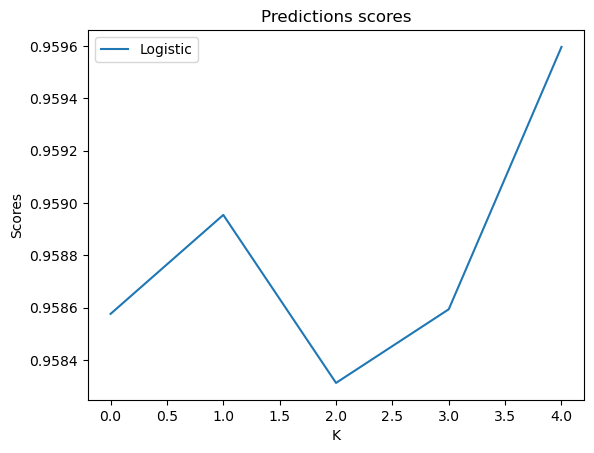

In [26]:
plt.title('Predictions scores')
plt.plot(df1['I'],df1['Logistic'], label = 'Logistic')
plt.legend()
plt.xlabel('K')
plt.ylabel('Scores')
plt.show()

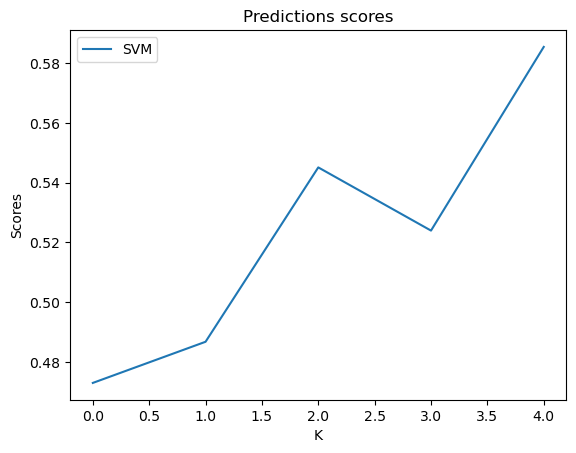

In [27]:
plt.title('Predictions scores')
plt.plot(df1['I'],df1['SVM'], label = 'SVM')
plt.legend()
plt.xlabel('K')
plt.ylabel('Scores')
plt.show()

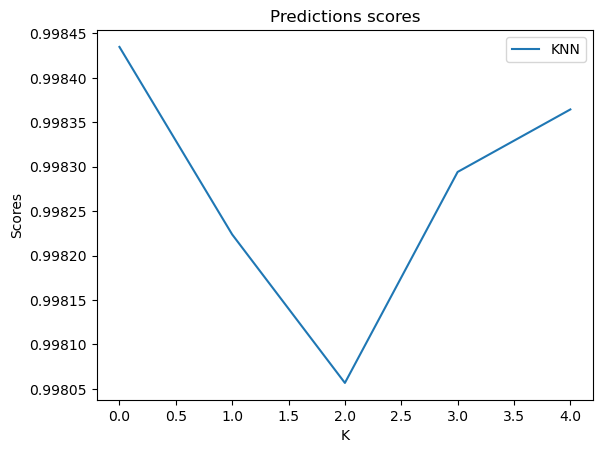

In [28]:
plt.title('Predictions scores')
plt.plot(df1['I'],df1['KNN'], label = 'KNN')
plt.legend()
plt.xlabel('K')
plt.ylabel('Scores')
plt.show()